# Stochastic Gradient Descent on Boston Data

Data Set Characteristics:

:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive

:Median Value (attribute 14) is usually the target

:Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

:Missing Attribute Values: None


In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#loading Data set
X = load_boston().data
Y = load_boston().target

In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.33)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(339, 13) (339,) (167, 13) (167,)


In [4]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

### SGD Regressor

### Number of iteration 100

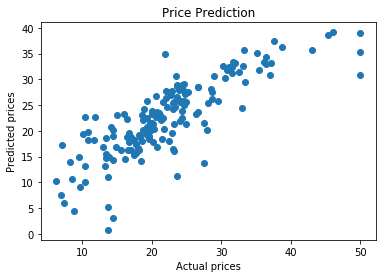

In [5]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', n_iter=100)
clf.fit(x_train,y_train)

#predicting prices using above model
y_pred_sgd_100 = clf.predict(x_test)

plt.scatter(y_test,y_pred_sgd_100)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Price Prediction')
plt.show()

In [6]:
weight_itr_100 = clf.coef_
intercept_itr_100 = clf.intercept_
MSE_itr_100 = mean_squared_error(y_test,y_pred_sgd_100)
print(MSE_itr_100)

23.682183341442546


### Number of iteration 200

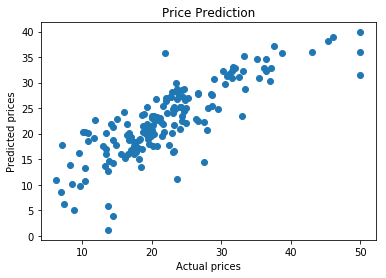

In [7]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', n_iter=200)
clf.fit(x_train,y_train)

#predicting prices using above model
y_pred_sgd_200 = clf.predict(x_test)

plt.scatter(y_test,y_pred_sgd_200)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Price Prediction')
plt.show()

In [8]:
weight_itr_200 = clf.coef_
intercept_itr_200 = clf.intercept_
MSE_itr_200 = mean_squared_error(y_test,y_pred_sgd_200)
print(MSE_itr_200)

23.6083224509965


### Number of iteration 300

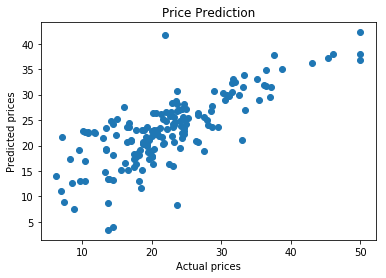

In [9]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', n_iter=300)
clf.fit(x_train,y_train)

#predicting prices using above model
y_pred_sgd_300 = clf.predict(x_test)

plt.scatter(y_test,y_pred_sgd_300)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Price Prediction')
plt.show()

In [10]:
weight_itr_300 = clf.coef_
intercept_itr_300 = clf.intercept_
MSE_itr_300 = mean_squared_error(y_test,y_pred_sgd_300)
print(MSE_itr_300)

30.65886893407606


### Number of iterations 500

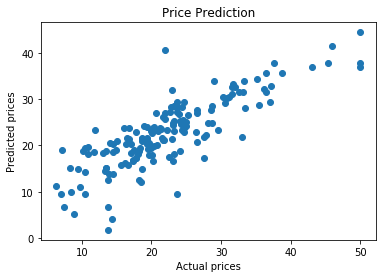

In [11]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', n_iter=500)
clf.fit(x_train,y_train)

#predicting prices using above model
y_pred_sgd_500 = clf.predict(x_test)

plt.scatter(y_test,y_pred_sgd_500)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Price Prediction')
plt.show()

In [12]:
weight_itr_500 = clf.coef_
intercept_itr_500 = clf.intercept_
MSE_itr_500 = mean_squared_error(y_test,y_pred_sgd_500)
print(MSE_itr_500)

23.553716900142536


### Creating a function for SGD Regressor

In [13]:
data=pd.DataFrame(data=x_train)
data['price']=y_train

In [14]:
#creating a function for SGD regressor
def manual_sgdregressor(x,eta0,k_points,n_iter):
    weight= np.zeros(x_train.shape[1])
    intercept=0
    t=1
    while n_iter>0:
        weight_sum= weight
        intercept_sum=intercept
        derivative_weight = np.zeros(x_train.shape[1])
        derivative_intercept = 0
        data=x.sample(10)
        x_=np.array(data.drop('price',axis=1))
        y_=np.array(data['price'])
        #solving below formula
        # dl(w)/dw = 1/K(-2x)(y-wT.x-b) and dl(b)/db = 1/K(-2)(y-wT.x-b)
        # applying above formula to Wj+1 = Wj - learning_rate(dl(w)/dw) and Bj+1 = Bj - learning_rate(dl(b)/db)
        for i in range(k_points):
            derivative_weight += (-2)*x_[i]*(y_[i]-(np.dot(weight_sum,x_[i])+intercept_sum))
            derivative_intercept +=  (-2)*(y_[i]-(np.dot(weight_sum,x_[i])+intercept_sum))
        weight = weight_sum - (eta0*derivative_weight/x_.shape[0])
        intercept = intercept_sum -(eta0*derivative_intercept/x_.shape[0])
        n_iter-=1
        t+=1
    return weight,intercept

### Number of iteration 100

In [16]:
weight_100,intercept_100 = manual_sgdregressor(data,eta0=0.01,k_points=10,n_iter=100)

y_pred_manual_100=[]
for i in range(len(x_test)):
    d=np.dot(weight_100,x_test[i])+intercept_100
    y_pred_manual_100.append(d)
y_pred_manual_100 = np.array(y_pred_manual_100)


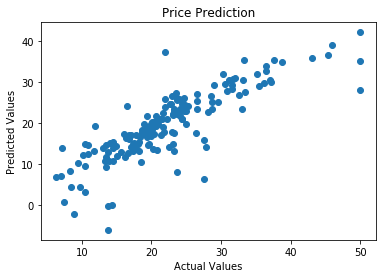

In [17]:
plt.scatter(y_test,y_pred_manual_100)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Price Prediction')
plt.show()

mse_100 = mean_squared_error(y_test,y_pred_manual_100)

### Number of iteration 200

In [18]:
weight_200,intercept_200 = manual_sgdregressor(data,eta0=0.01,k_points=10,n_iter=200)

y_pred_manual_200=[]
for i in range(len(x_test)):
    d=np.dot(weight_200,x_test[i])+intercept_200
    y_pred_manual_200.append(d)
y_pred_manual_200 = np.array(y_pred_manual_200)

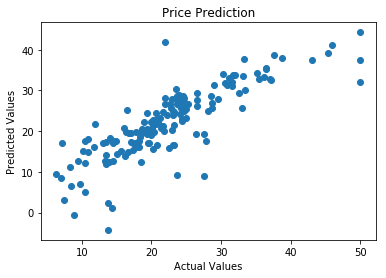

In [19]:
plt.scatter(y_test,y_pred_manual_200)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Price Prediction')
plt.show()

mse_200 = mean_squared_error(y_test,y_pred_manual_200)

### Number of iteration 300

In [20]:
weight_300,intercept_300 = manual_sgdregressor(data,eta0=0.01,k_points=10,n_iter=300)

y_pred_manual_300=[]
for i in range(len(x_test)):
    d=np.dot(weight_300,x_test[i])+intercept_300
    y_pred_manual_300.append(d)
y_pred = np.array(y_pred_manual_300)

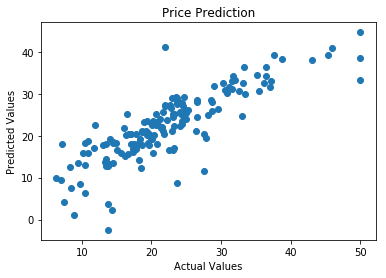

In [21]:
plt.scatter(y_test,y_pred_manual_300)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Price Prediction')
plt.show()

mse_300 = mean_squared_error(y_test,y_pred_manual_300)

### Number of iteration 500

In [22]:
weight_500,intercept_500 = manual_sgdregressor(data,eta0=0.01,k_points=10,n_iter=500)

y_pred_manual_500=[]
for i in range(len(x_test)):
    d=np.dot(weight_500,x_test[i])+intercept_500
    y_pred_manual_500.append(d)
y_pred = np.array(y_pred_manual_500)

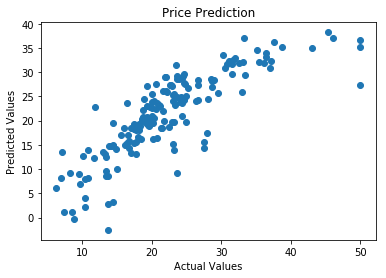

In [23]:
plt.scatter(y_test,y_pred_manual_500)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Price Prediction')
plt.show()

mse_500 = mean_squared_error(y_test,y_pred_manual_500)

## Comparing predicted prices of SGDRegressor and Manually created SGD

### 100 iterations and learning rate 0.01

<function matplotlib.pyplot.show(*args, **kw)>

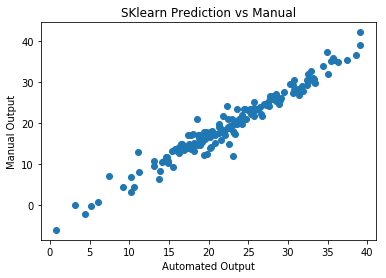

In [24]:
plt.scatter(y_pred_sgd_100,y_pred_manual_100)
plt.xlabel('Automated Output')
plt.ylabel('Manual Output')
plt.title('SKlearn Prediction vs Manual')
plt.show

### 200 iterations and learning rate 0.01

<function matplotlib.pyplot.show(*args, **kw)>

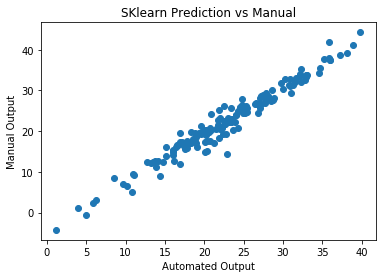

In [25]:
plt.scatter(y_pred_sgd_200,y_pred_manual_200)
plt.xlabel('Automated Output')
plt.ylabel('Manual Output')
plt.title('SKlearn Prediction vs Manual')
plt.show

### 300 iterations and learning rate 0.01

<function matplotlib.pyplot.show(*args, **kw)>

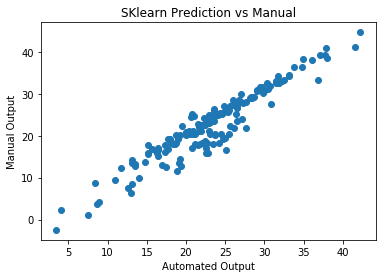

In [26]:
plt.scatter(y_pred_sgd_300,y_pred_manual_300)
plt.xlabel('Automated Output')
plt.ylabel('Manual Output')
plt.title('SKlearn Prediction vs Manual')
plt.show

### 500 iterations and learning rate 0.01

<function matplotlib.pyplot.show(*args, **kw)>

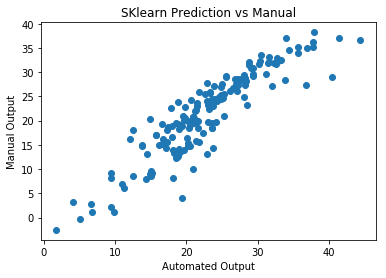

In [27]:
plt.scatter(y_pred_sgd_500,y_pred_manual_500)
plt.xlabel('Automated Output')
plt.ylabel('Manual Output')
plt.title('SKlearn Prediction vs Manual')
plt.show

## Comparing weight vectors for iterations 100,200,300,500

In [28]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Weight vector SGD','Weight vector Manual']
for i in range(13):
    x.add_row([weight_itr_100[i],weight_100[i]])
print(x)

+----------------------+----------------------+
|  Weight vector SGD   | Weight vector Manual |
+----------------------+----------------------+
| 0.06407184026760665  | -0.4266348946898052  |
|  0.9969939872064781  | 0.48717409292451463  |
| -0.24563377546114779 | -0.4908533326876295  |
|  0.401365144599031   |  0.862912680361452   |
| -2.5171420066996233  | -0.5464910269899602  |
|  2.577553467761714   |  3.6637220491871374  |
| 0.06732977082783013  | -0.5108084553996055  |
| -2.8932077033327515  |  -1.854256848017981  |
|  2.192321892785462   | 0.11173087938658477  |
| -2.0661838128729224  | -0.2765723678055477  |
| -1.6398169974561116  | -2.1190424065269933  |
| 0.062118925340562264 |  0.5624764685335016  |
| -3.9221712388848315  | -3.5242965086495537  |
+----------------------+----------------------+


In [29]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Weight vector SGD','Weight vector Manual']

for i in range(13):
    x.add_row([weight_itr_200[i],weight_200[i]])
print(x)

+-----------------------+----------------------+
|   Weight vector SGD   | Weight vector Manual |
+-----------------------+----------------------+
|  -0.20500381396124337 | -0.5475390862693242  |
|   1.0774668866073867  |  0.8195718891648882  |
| -0.026397249697574992 | -0.43248896065047476 |
|   0.4543506681651242  |  0.7527318436038659  |
|   -2.363094958452416  | -0.9936104016476924  |
|   2.6055842026837643  |  3.9472132354322955  |
|   0.131332434926586   | -0.48294050389221177 |
|   -3.077789034309966  | -2.1587232517138184  |
|   2.249398409055779   |  0.8652870452482839  |
|  -1.9837094217753626  | -0.3016896166842004  |
|   -1.72501920340408   | -1.6841779507290657  |
|   -0.136487880666147  |  0.7526337318524928  |
|  -3.8454765754905917  |  -3.833020443850386  |
+-----------------------+----------------------+


In [30]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Weight vector SGD','Weight vector Manual']
for i in range(13):
    x.add_row([weight_itr_300[i],weight_300[i]])
print(x)

+---------------------+----------------------+
|  Weight vector SGD  | Weight vector Manual |
+---------------------+----------------------+
| -0.4049794818662955 | -0.5423769382200605  |
|  1.2053801956762098 |  0.5288086146875614  |
| 0.44463664701329797 | -0.3517277735460034  |
|  0.5320222635628871 |  0.7275471762857508  |
| -1.9120789392698403 | -1.3453436747083143  |
|  2.729775440403277  |  3.5346215727657784  |
| 0.35387014140439904 | 0.06491910587810552  |
| -3.3235481649433196 | -2.4929774038366848  |
|  3.082275869318035  |  1.1234768229155818  |
|  -1.132051062838878 | -0.49029348193176225 |
| -1.6695916164579108 | -1.8586875463871506  |
| 0.09079004727601105 |  0.7230108537612435  |
|  -4.308866516740649 |  -4.04583792639506   |
+---------------------+----------------------+


In [31]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Weight vector SGD','Weight vector Manual']

for i in range(13):
    x.add_row([weight_itr_500[i],weight_500[i]])
print(x)

+---------------------+-----------------------+
|  Weight vector SGD  |  Weight vector Manual |
+---------------------+-----------------------+
| -0.4357938939654134 |  -1.3929086584375563  |
|  0.9022219140881828 |   1.073243826530596   |
|  0.2104873478880485 |  -0.02273446309360827 |
|  1.2536109772514836 | -0.005417077735276929 |
|  -2.057217879191132 |  -2.7616500270237117  |
|  2.429520757805049  |   1.886613523288649   |
|  0.3295934368987477 |   0.8881726068798649  |
| -3.4571715881607723 |   -2.077697611052211  |
|  2.5102818409079153 |   1.770831040193123   |
|  -1.834806919435501 |  -1.8566011406934262  |
|  -1.896917909660306 |  -1.9858721483698163  |
|  0.5081165761437572 |   0.8708341897038726  |
|  -4.305879689207346 |  -4.2447165801934625  |
+---------------------+-----------------------+


In [33]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Number Of Iterations", "Auto SGD MSE", "Manual SGD MSE"]
x.add_row([ 100, 23.68 , 29.99])
x.add_row([ 200, 23.60  , 24.20])
x.add_row([ 300, 30.65  , 22.95])
x.add_row([ 500, 23.53  , 25.54])

print(x)

+----------------------+--------------+----------------+
| Number Of Iterations | Auto SGD MSE | Manual SGD MSE |
+----------------------+--------------+----------------+
|         100          |    23.68     |     29.99      |
|         200          |     23.6     |      24.2      |
|         300          |    30.65     |     22.95      |
|         500          |    23.53     |     25.54      |
+----------------------+--------------+----------------+


## Observation

1. Predicted Values for sgdregressor and Manual SGD regressor are equavalent for 100 and 200 iterations
2. Fluctuations in Mean squared error of Sklearn SGD regressor it first decreased from 100 to 200 iterations
   but increased on 300 iterations /> 
3. Mean squared error of Manually implemented SGD reduced till 300 iterations but increased after that />
4. Used constant learning rate of 0.01 />
5. Observed more scatterness in data when used inverse scaling in learning rate />
6. Both sklearn SGD and manually implemented SGD gave almost same results />